以下の書籍の勉強ノートを作成する。

[Rによる多変量解析入門](https://www.amazon.co.jp/R%E3%81%AB%E3%82%88%E3%82%8B%E5%A4%9A%E5%A4%89%E9%87%8F%E8%A7%A3%E6%9E%90%E5%85%A5%E9%96%80-%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AE%E5%AE%9F%E8%B7%B5%E3%81%A8%E7%90%86%E8%AB%96-%E5%B7%9D%E7%AB%AF-%E4%B8%80%E5%85%89/dp/4274222365)

勉強を兼ねて`tidyverse`を用いる方針を取る。
使用しているデータの再配布は禁じられているため、このリポジトリには含まない。
こちらの[リンク](https://www.ohmsha.co.jp/book/9784274222368/)より取得すること

# 第一章

In [4]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [24]:
# 前処理はグラフ化にはtidyverseツールセットを使う方針ですすめるので、
# read_csvではなく、readr::read_csvをつかう。
# また、Linux上で作業するため、データがshift-jisであることを明示する必要がある。
jhk <- readr::read_csv('人事評価結果.csv', locale=locale(encoding="SJIS"))

Parsed with column specification:
cols(
  ID = col_double(),
  性別 = col_character(),
  部署 = col_character(),
  年代 = col_character(),
  協調性 = col_double(),
  自己主張 = col_double(),
  技能 = col_double(),
  知識 = col_double(),
  ストレス = col_double(),
  総合 = col_double(),
  昨年総合 = col_double()
)


1. 行数・列数の確認　

    関数`dim`により多変量データの行数と列数を確認

1. 変数名の確認　

    関数`colnames`により変数名を確認


1. ファイルの中身を確認

    関数`head`により最初の数行を表示

2つ目の`readr::read_csv()`が実行してくれるので、
`dim`、`head`を使って内容を確認すれば大丈夫



In [18]:
dim(jhk)

[1] 800  11

In [19]:
colnames(jhk)

[1] "ID"       "性別"     "部署"     "年代"     "協調性"   "自己主張"
 [7] "技能"     "知識"     "ストレス" "総合"     "昨年総合"

In [37]:
#head(jhk, 10)  # n=は省略可能　
head(jhk, n=3)

ID,性別,部署,年代,協調性,自己主張,技能,知識,ストレス,総合,昨年総合
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,A部,中堅,70,45,65,71,53,251,248
2,F,B部,熟練,45,62,51,72,64,227,211
3,M,A部,中堅,54,70,55,70,61,249,242


### 単変量データの基礎分析
#### ヒストグラムの描画

In [30]:
library(lattice)

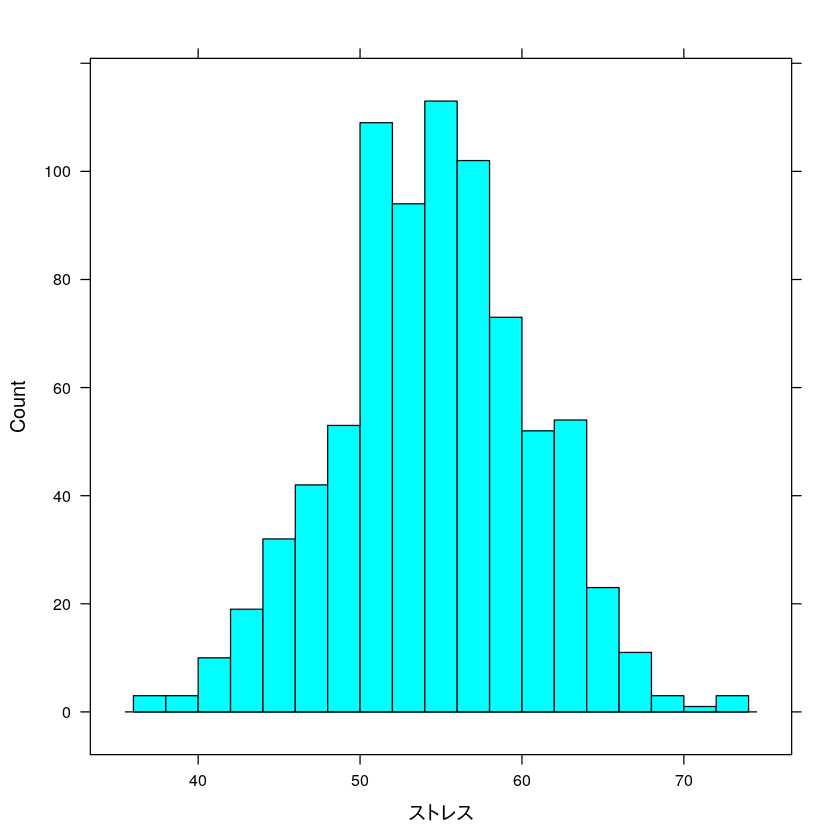

In [31]:
# テキストに載っている作図方法。
histogram( ~ ストレス, data=jhk, breaks=20, type='count')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


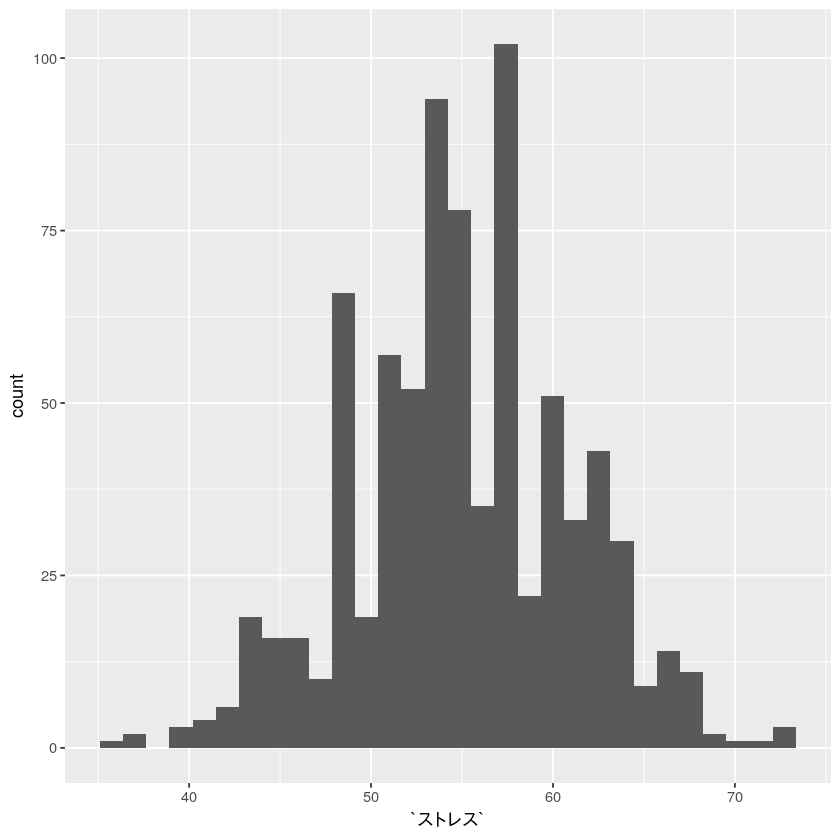

In [36]:
ggplot(data = jhk) +
    geom_histogram(mapping = aes(x = ストレス))
# 下のような記述でも可能
#ggplot(jhk, aes(ストレス)) +
#    geom_histogram()

#### 代表値

In [40]:
mean(jhk$ストレス)　# ストレスの平均値
median(jhk$ストレス) # ストレスの中央値
sort(table(jhk$年代)) # 年代の最頻値

[1] 55.0525

[1] 55


熟練 中堅 若手 
 177  308  315 

#### 散布度

In [45]:
sd(jhk$ストレス)  # 標準偏差
var(jhk$ストレス) # 不偏分散。不偏分散とは母集団の分散の推定値を意味する
mean(abs(jhk$ストレス - median(jhk$ストレス))) # 中央値からの平均偏差。中央値を代表値とした場合の散布度を表す

[1] 6.02288

[1] 36.27509

[1] 4.7325

### 単変量データの群間比較

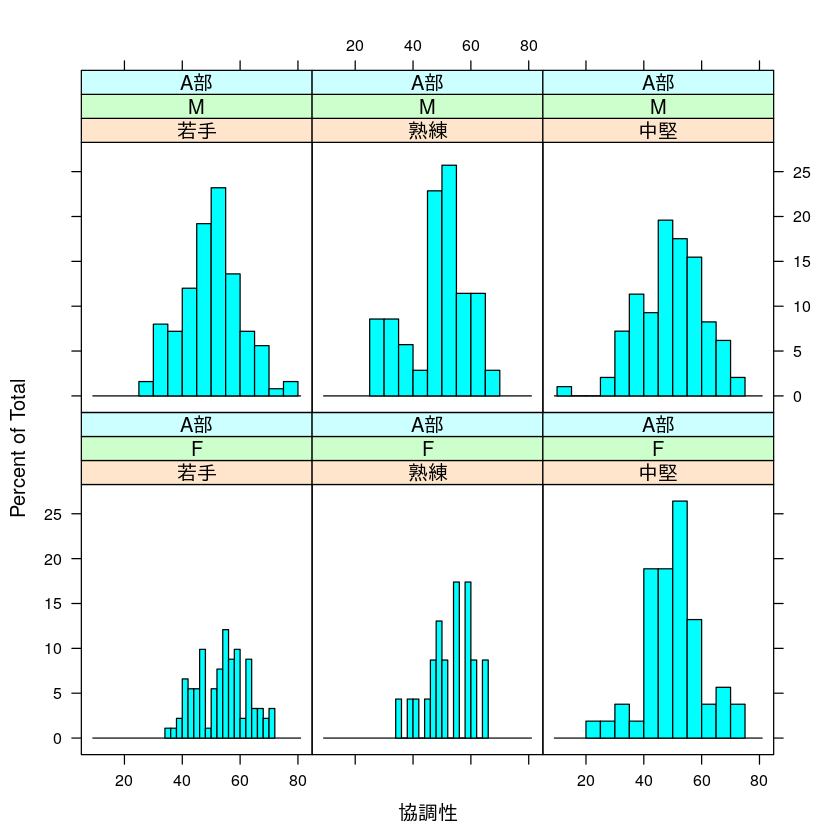

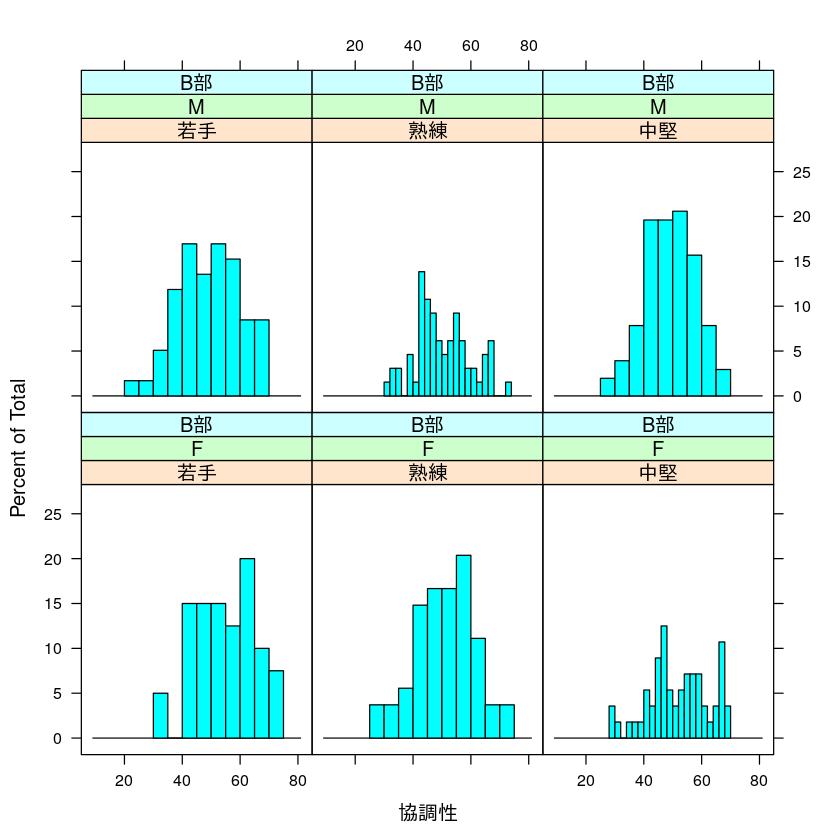

In [48]:
# Latticeパッケージのhistogramはなかなか作図しやすい
#histogram(~ 協調性 | 年代 + 性別, data=jhk, breaks=15)
histogram(~ 協調性 | 年代 + 性別 + 部署, data=jhk, breaks=15)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


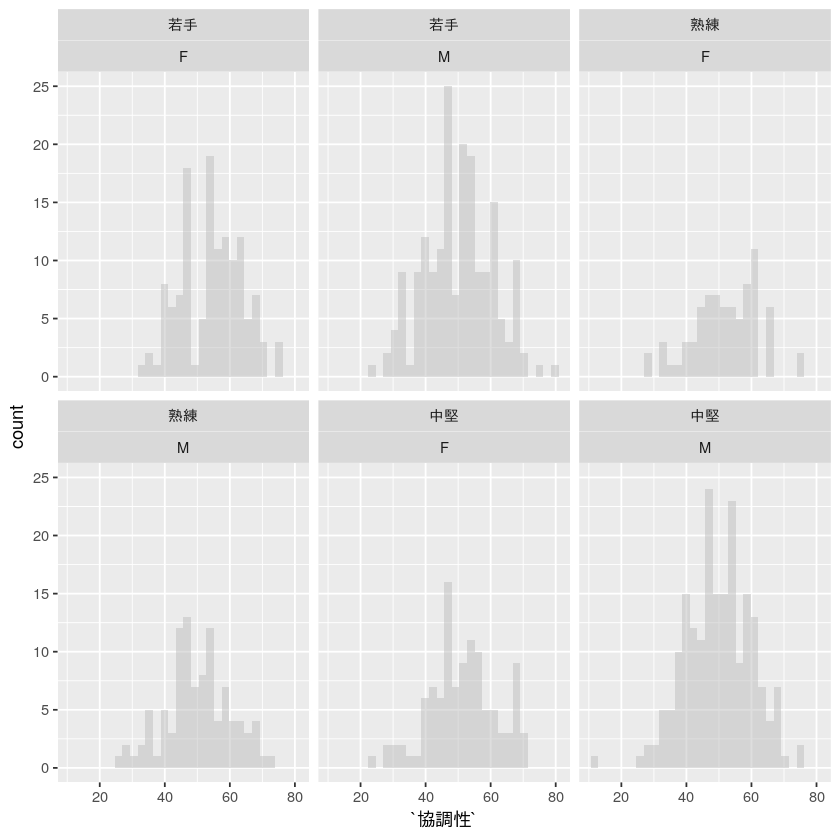

In [68]:
#同じことをggplotでやる場合には…
ggplot(data = jhk) +
    geom_histogram(mapping = aes(x = 協調性), fill="grey", alpha=.5) + 
    #geom_histogram(colour=性別) +
    facet_wrap(年代 ~ 性別) # 2条件の場合
    #facet_wrap(年代 ~ 性別 ~ 部署) # 3条件の場合

#### 代表値と散布度

群別に代表値や散布度を求める方法

In [78]:
tapply(jhk$協調性, jhk$性別, mean) # 性別毎に協調性の平均値を求める
tapply(jhk$協調性, jhk$性別, sd) # 性別毎に協調性のSDを求める

F        M 
52.92114 50.05590

F         M 
 9.845809 10.116078

In [74]:
# dplyrを用いると以下のように1行で記述できる
jhk %>%
    dplyr::group_by(性別) %>%
    dplyr::summarise(mean(協調性), sd(協調性))

性別,mean(協調性),sd(協調性)
<chr>,<dbl>,<dbl>
F,52.92114,9.845809
M,50.05590,10.116078


#### 箱ひげ図 box plot

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   44.00   51.00   51.19   58.00   79.00 

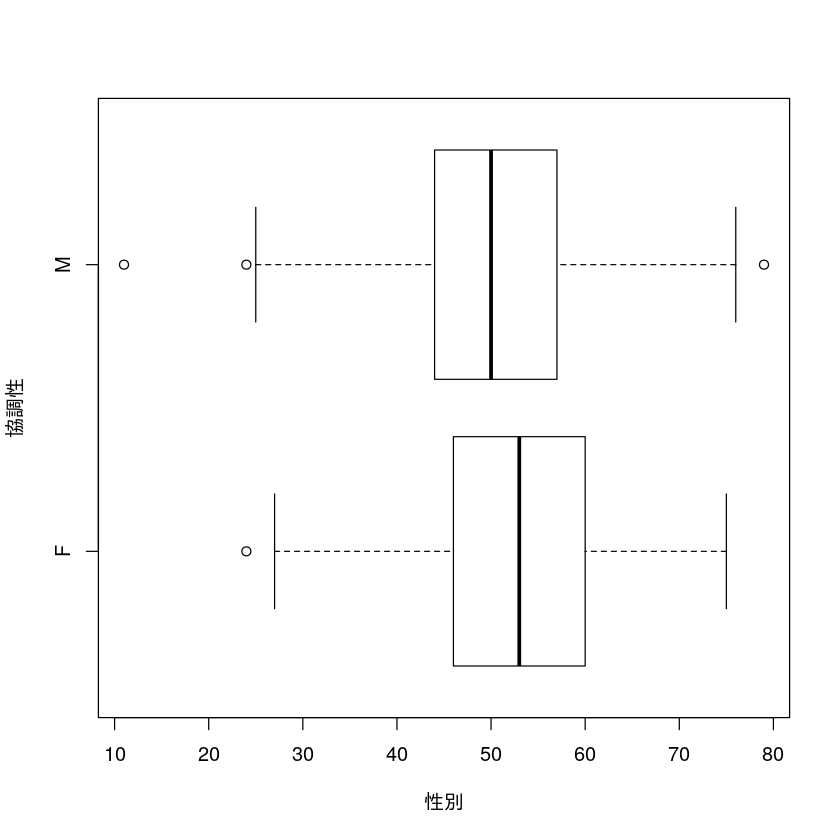

In [85]:
# baseを用いた作図方法
#boxplot(jhk$技能, horizontal=TRUE)
boxplot(協調性 ~ 性別, data=jhk, horizontal=TRUE)
summary(jhk$協調性)

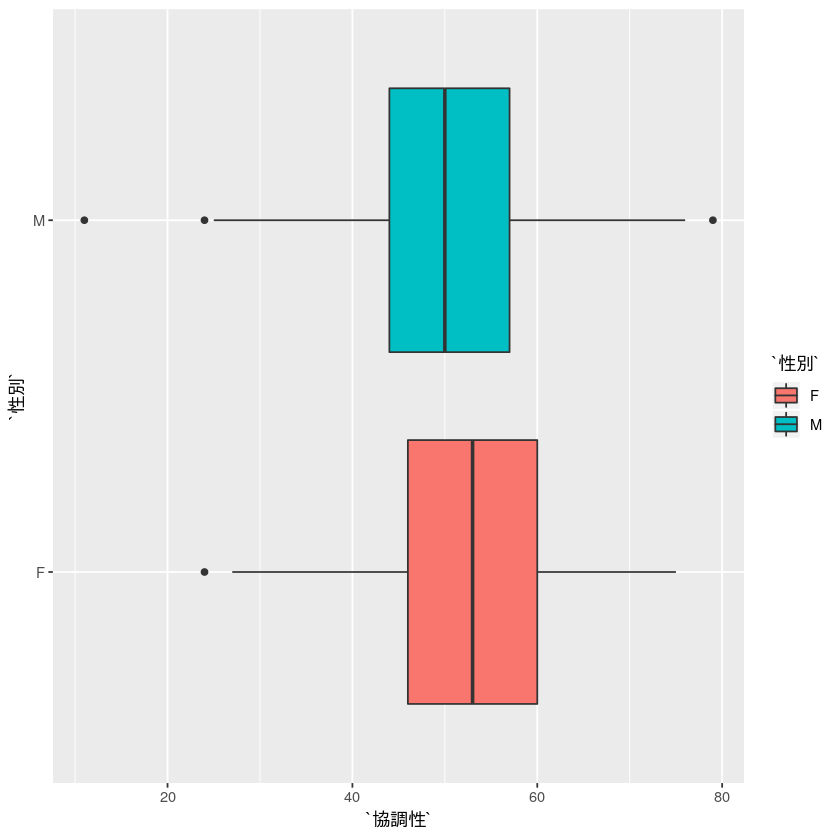

In [91]:
# ggplotを用いたboxplotの作図方法
ggplot(data = jhk) +
    geom_boxplot(mapping = aes(x=性別, y=協調性, fill=性別)) +
    coord_flip()
    #geom_boxplot(mapping = aes(x=協調性, y=性別))

#### $t$検定　

独立な2群の$t$検定。
最初に等分散性に関して$F$検定を行い、$t$検定にかける2群の等分散性を確認する。

下記の通り、$p > 0.05$となったため、優位水準5%で、'2群の母分散が等しい'という帰無仮説を棄却できない。
従って、等分散が成り立っていないという**積極的な証拠は得られなかったので**、等分散を過程した
独立な2群の$t$検定を行う。

In [1]:
print('F検定')
var.test(協調性 ~ 性別, data = jhk)
print('t検定')
t.test(協調性 ~ 性別, data = jhk, var.equal = TRUE)
# 等分散性が仮定できない場合には、Welch法を用いる
t.test(協調性 ~ 性別, data = jhk, var.equal = FALSE) # 

[1] "F検定"


ERROR: Error in eval(m$data, parent.frame()):  オブジェクト 'jhk' がありません 
